In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats#for statistical asnlysis
df = pd.read_excel('D:\JOY\J AMITY\Machine Learning/Acoustic_Extinguisher_Fire_Dataset.xlsx')
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [2]:
df.isnull().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

In [3]:
df.FUEL.value_counts()

FUEL
gasoline    5130
thinner     5130
kerosene    5130
lpg         2052
Name: count, dtype: int64

In [4]:
df.SIZE.value_counts()

SIZE
1    3078
2    3078
3    3078
4    3078
5    3078
6    1026
7    1026
Name: count, dtype: int64

In [5]:
df.DISTANCE.value_counts()

DISTANCE
10     918
110    918
180    918
170    918
160    918
150    918
140    918
130    918
120    918
100    918
20     918
90     918
80     918
70     918
60     918
50     918
40     918
30     918
190    918
Name: count, dtype: int64

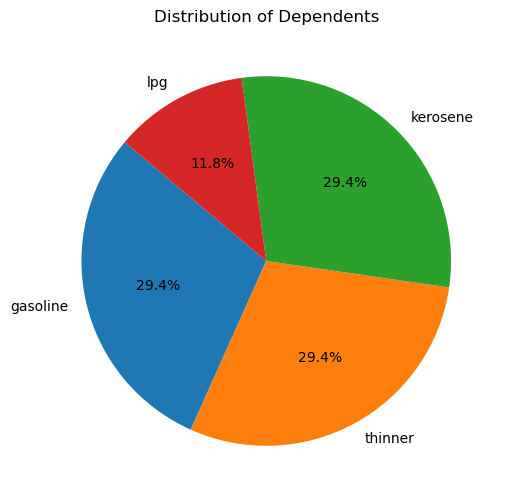

In [6]:
FUEL_counts = df['FUEL'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(FUEL_counts, labels=FUEL_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Dependents')
plt.show()

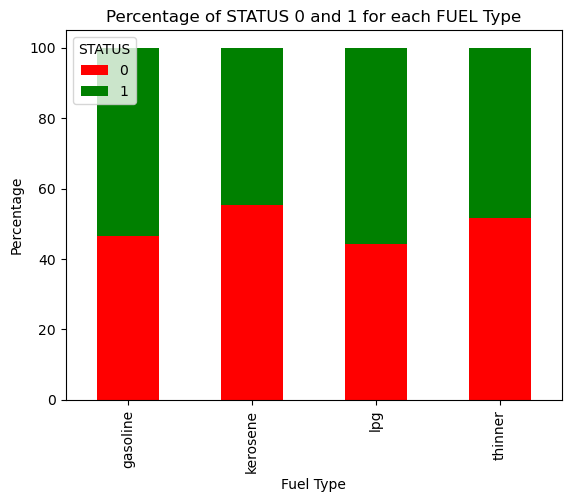

In [7]:
fuel_status_counts = df.groupby(['FUEL', 'STATUS']).size().unstack(fill_value=0)

fuel_status_percentages = fuel_status_counts.div(fuel_status_counts.sum(axis=1), axis=0) * 100

fuel_status_percentages.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.xlabel('Fuel Type')
plt.ylabel('Percentage')
plt.title('Percentage of STATUS 0 and 1 for each FUEL Type')
plt.legend(title='STATUS', loc='upper left', labels=['0', '1'])

plt.show()


In [8]:
df = pd.get_dummies(df, columns=['FUEL'], drop_first=True)

In [9]:
df

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,FUEL_kerosene,FUEL_lpg,FUEL_thinner
0,1,10,96,0.0,75,0,False,False,False
1,1,10,96,0.0,72,1,False,False,False
2,1,10,96,2.6,70,1,False,False,False
3,1,10,96,3.2,68,1,False,False,False
4,1,10,109,4.5,67,1,False,False,False
...,...,...,...,...,...,...,...,...,...
17437,7,190,86,2.2,5,0,False,True,False
17438,7,190,84,2.0,4,0,False,True,False
17439,7,190,80,1.5,3,0,False,True,False
17440,7,190,76,0.4,2,0,False,True,False


In [10]:
X=df.drop(columns=['STATUS'])
y=df.STATUS

In [15]:
X.head()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,FUEL_kerosene,FUEL_lpg,FUEL_thinner
0,1,10,96,0.0,75,False,False,False
1,1,10,96,0.0,72,False,False,False
2,1,10,96,2.6,70,False,False,False
3,1,10,96,3.2,68,False,False,False
4,1,10,109,4.5,67,False,False,False


In [16]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: STATUS, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

print(f'R^2 Score: {r2}')
print(f'Accuracy: {accuracy}%')

R^2 Score: 0.9200271451345177
Accuracy: 92.00271451345176%


In [30]:
features = [[1, 10, 96, 2.6, 70, False, False, False]]
model.predict(features)[0] >=0.5

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


True

In [31]:
features = [[1	,10	,96	,0.0	,75	,False	,False	,False]]
model.predict(features)[0]>= 0.5

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


False

In [32]:
from sklearn.metrics import confusion_matrix

threshold = 0.5
y_pred_class = (y_pred >= threshold).astype(int)
y_test_class = (y_test >= threshold).astype(int)

cm = confusion_matrix(y_test_class, y_pred_class)

print("Confusion Matrix:")
print(cm)

# Calculate accuracy
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
accuracy_percentage = accuracy * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')


Confusion Matrix:
[[1663   51]
 [  44 1731]]
Accuracy: 97.28%
